Name: Zhangli Wang<br>

In [1]:
import csv
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
# read CSV files
df_1083 = pd.read_csv('./Datasets/rawpvr_2018-02-01_28d_1083 TueFri.csv')
df_1415 = pd.read_csv('./Datasets/rawpvr_2018-02-01_28d_1415 TueFri.csv')
dfs = {'1083': df_1083, 
       '1415': df_1415}
df_1083.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503768 entries, 0 to 503767
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            503768 non-null  object 
 1   Lane            503768 non-null  int64  
 2   Lane Name       503768 non-null  object 
 3   Direction       503768 non-null  int64  
 4   Direction Name  503768 non-null  object 
 5   Speed (mph)     503749 non-null  float64
 6   Headway (s)     493776 non-null  float64
 7   Gap (s)         489693 non-null  float64
 8   Flags           503768 non-null  int64  
 9   Flag Text       0 non-null       float64
dtypes: float64(4), int64(3), object(3)
memory usage: 38.4+ MB


# Task1A

In [3]:
l_days_of_week = list()
for df in dfs.values():
    # slice to acquire the 'Date' column
    date = df.loc[:, 'Date']
    # type conversion: string > timestamp
    date = pd.to_datetime(date)

    # calculate days of the week
    days_of_week = [item.dayofweek for item in date]
    # type conversion: list > series
    days_of_week = pd.Series(np.array(days_of_week).T)
    l_days_of_week.append(days_of_week)
l_days_of_week

[0         4
 1         4
 2         4
 3         4
 4         4
          ..
 503763    1
 503764    1
 503765    1
 503766    1
 503767    1
 Length: 503768, dtype: int32,
 0         4
 1         4
 2         4
 3         4
 4         4
          ..
 289073    1
 289074    1
 289075    1
 289076    1
 289077    1
 Length: 289078, dtype: int32]

In [4]:
for df, days_of_week in zip(dfs.values(), l_days_of_week):
    # update the column 'Flags' in the original dataframe
    df.loc[:, 'Flags'] = days_of_week.map(lambda x: x+1, na_action='ignore')

    # update the column 'Flag Text' in the original dataframe
    df.loc[:, 'Flag Text'] = days_of_week.map(lambda x: 'Tuesday' if x == 1 else ('Friday' if x == 4 else ''), na_action='ignore')
dfs

{'1083':                               Date  Lane Lane Name  Direction Direction Name  \
 0       2018-02-02 00:00:03.050000     6     SB_NS          2          South   
 1       2018-02-02 00:00:22.010000     5    SB_MID          2          South   
 2       2018-02-02 00:00:22.020000     4     SB_OS          2          South   
 3       2018-02-02 00:00:36.040000     6     SB_NS          2          South   
 4       2018-02-02 00:00:49.070000     6     SB_NS          2          South   
 ...                            ...   ...       ...        ...            ...   
 503763  2018-02-27 23:59:00.090000     2    NB_MID          1          North   
 503764  2018-02-27 23:59:29.090000     6     SB_NS          2          South   
 503765  2018-02-27 23:59:32.050000     4     SB_OS          2          South   
 503766  2018-02-27 23:59:33.070000     6     SB_NS          2          South   
 503767  2018-02-27 23:59:58.050000     1     NB_NS          1          North   
 
         Speed (mp

# Task1B

In [5]:
l_total_traffic = dict()
for key, df in dfs.items():
    # sort out rows that contains Tuesdays and Fridays, respectively
    df_tus = df.loc[df['Flags'] == 2]
    df_fri = df.loc[df['Flags'] == 5]
    
    # calculate sum of rows
    count_tus = len(df_tus.index)
    count_fri = len(df_fri.index)
    
    # record results
    l_total_traffic.update({key+' total traffic on tus': count_tus})
    l_total_traffic.update({key+' total traffic on fri': count_fri})
l_total_traffic

{'1083 total traffic on tus': 248017,
 '1083 total traffic on fri': 255751,
 '1415 total traffic on tus': 138891,
 '1415 total traffic on fri': 150187}

## Results
For site 1083 total traffic volumn on Tuesday: 248017<br>
For site 1083 total traffic volumn on Friday: 255751<br>

For site 1415 total traffic volumn on Tuesday: 138891<br>
For site 1415 total traffic volumn on Friday: 150187<br>
<br>
<br>
Screenshots of the two datasets after execution:<br>
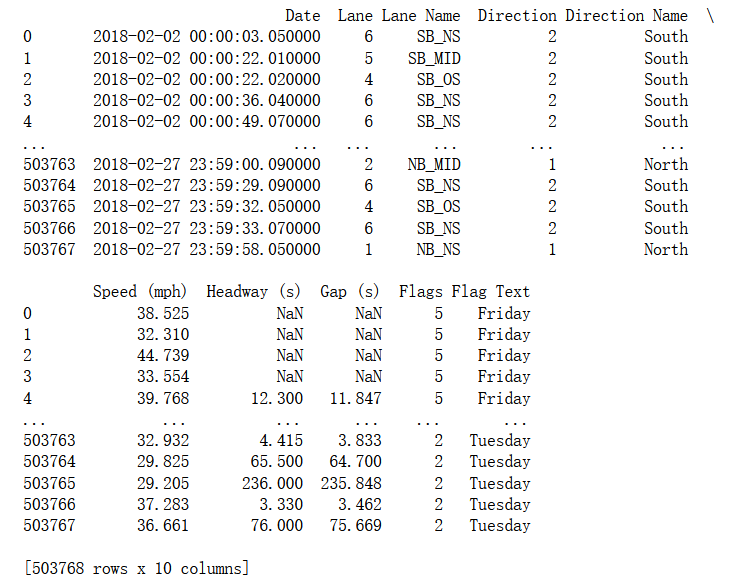<br>
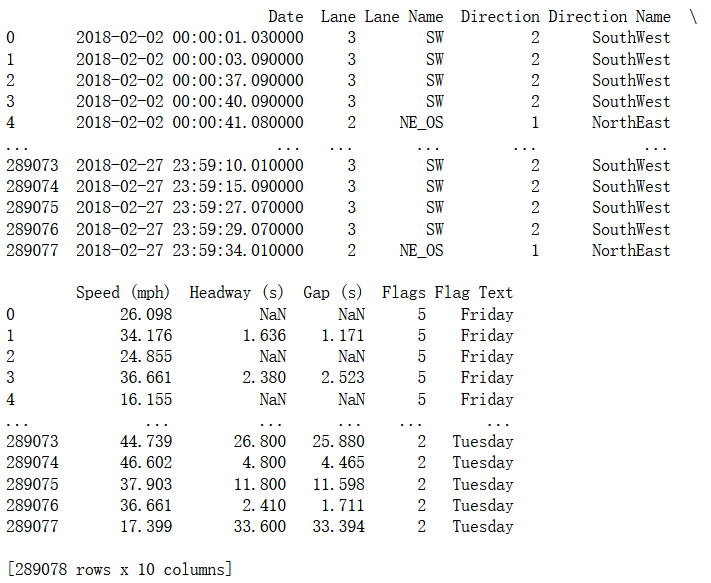<br>

# Task1C
In terms of data preparation, it is necessary in completing Task1A. As the read type of instances in the dataset is string, to make it easier to recognize whether it is Tuesday or Friday, the type of the column 'Date' can be converted to timestamp for the recognition. Besides, the recognized flag starts from 0, we should plus the flag with 1 to make it more sense for a human (2 indicated Tuesday rather than 1).<br>
<br>
For Task1B, a data preparation is executed that in each dataframe, rows should be catogoried by whether the record is on Tuesday or Friday. It helps calculating the results.<br>
<br>
## Explaination with Codes
### For Task1A

```python
    # slice to acquire the 'Date' column
    date = df.loc[:, 'Date']
    # type conversion: string > timestamp
    date = pd.to_datetime(date)
```
This data preparation operation is needed as in the following steps we need this column as timestamp type to check whether it is Tuesday or Friday.<br>
<br>
```python
    # update the column 'Flags' in the original dataframe
    df.loc[:, 'Flags'] = days_of_week.map(lambda x: x+1, na_action='ignore')
```
This data preparation operation is needed as it is required in the desired output to shift the original output of the `dayofweek` function.<br>
<br>
### For Task1B
```python
for key, df in dfs.items():
    # sort out rows that contains Tuesdays and Fridays, respectively
    df_tus = df.loc[df['Flags'] == 2]
    df_fri = df.loc[df['Flags'] == 5]
```
It is a data preparation process used for future data manipulation. This data preparation operation is needed as it makes counting the traffic volumn possible.